In [18]:
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np
import seaborn as sns
import sys

import random
import math
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import signatureanalyzer as sa

In [3]:
prepost_maf = pd.read_csv('pre_post_muts_updated_MGH0001_0505_with_clones.tsv',sep='\t')
prepost_maf

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,MGH0001,MGH0001-APCCD,NaN,HPSE2,10,100374744,G,C,201,10,...,13,NaN,NaN,0.58,0.29,0.90,0.72,0.71,0.74,MGH0001_13
1,MGH0001,MGH0001-APCCD,NaN,ERLIN1,10,101937964,A,-,136,0,...,15,NaN,NaN,0.09,0.00,0.22,0.01,0.01,0.01,MGH0001_15
2,MGH0001,MGH0001-APCCD,NaN,CHUK,10,101969473,G,A,128,0,...,15,NaN,NaN,0.10,0.00,0.23,0.01,0.01,0.01,MGH0001_15
3,MGH0001,MGH0001-APCCD,NaN,SCD,10,102120637,G,A,329,1,...,15,NaN,NaN,0.10,0.01,0.19,0.01,0.01,0.01,MGH0001_15
4,MGH0001,MGH0001-APCCD,NaN,HIF1AN,10,102295895,G,-,35,0,...,15,NaN,NaN,0.27,0.00,0.63,0.01,0.01,0.01,MGH0001_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89862,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,Unknown,6,58287428,A,-,125,106,...,1,NaN,NaN,0.98,0.95,1.00,1.00,1.00,1.00,MGHCC1573_1
89863,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,C17orf104,17,42750683,TTAAG,-,12,10,...,1,NaN,NaN,0.90,0.76,1.00,1.00,1.00,1.00,MGHCC1573_1
89864,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,RIF1,2,152331365,TT,-,111,46,...,1,NaN,NaN,0.95,0.88,1.00,1.00,1.00,1.00,MGHCC1573_1
89865,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,RALY,20,32664911,GGTGGC,-,107,37,...,2,NaN,NaN,0.93,0.84,1.00,0.96,0.91,1.00,MGHCC1573_2


In [4]:
grouped = prepost_maf.groupby(['Hugo_Symbol','Start_position'])
genes_below_10_percent = []
genes_below_20_percent = []
for name,group in grouped:

    ## need to check if it is below 20% for every individual sample, not the mean
    ccf_list = group.loc[:,'preDP_ccf_mean'].to_list()
    if group.loc[:,'preDP_ccf_mean'].max() < 0.20:
        genes_below_20_percent.append(name)
        
print(len(set(genes_below_20_percent)))

18691


In [5]:
genes_below_20_percent

[('A1CF', 52573764),
 ('A1CF', 52573788),
 ('A1CF', 52573806),
 ('A1CF', 52619591),
 ('A1CF', 52619647),
 ('AAK1', 69703031),
 ('AAK1', 69703082),
 ('AAK1', 69736428),
 ('AAK1', 69736455),
 ('AAK1', 69759286),
 ('AAMDC', 77531641),
 ('AAMDC', 77531650),
 ('AAMDC', 77531668),
 ('AARS', 70301677),
 ('ABCA1', 107579605),
 ('ABCA1', 107579692),
 ('ABCA1', 107591281),
 ('ABCA12', 215854076),
 ('ABCA2', 139905654),
 ('ABCA2', 139905717),
 ('ABCA2', 139910479),
 ('ABCA2', 139910509),
 ('ABCA2', 139910518),
 ('ABCA4', 94473258),
 ('ABCA4', 94473267),
 ('ABCA5', 67264165),
 ('ABCB1', 87160676),
 ('ABCB1', 87160688),
 ('ABCB1', 87179241),
 ('ABCB11', 169781197),
 ('ABCB11', 169781206),
 ('ABCB4', 87081020),
 ('ABCB4', 87081106),
 ('ABCB6', 220079711),
 ('ABCB6', 220079729),
 ('ABCB9', 123434369),
 ('ABCB9', 123434396),
 ('ABCC5', 183689829),
 ('ABCC5', 183703192),
 ('ABCC5', 183705578),
 ('ABCC5', 183705627),
 ('ABCC8', 17415292),
 ('ABCE1', 146030353),
 ('ABCE1', 146030354),
 ('ABCF3', 18390435

In [7]:
driver_gene_list = set(pd.read_csv('Driver_genes_v1.0.txt',sep='\t', header=None)[0])
driver_gene_list.add('KMT2C')
driver_gene_list.add('KMT2D')

In [8]:
to_blacklist = []
for i, row in prepost_maf.iterrows():
    if row['Hugo_Symbol'] in driver_gene_list:
        continue
    
    if (row['Hugo_Symbol'], row['Start_position']) in genes_below_20_percent:
        to_blacklist.append(row)
        
low_CCF_to_remove = pd.DataFrame(to_blacklist)
low_CCF_to_remove

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
42,MGH0001,MGH0001-APCCD,NaN,UROS,10,127486632,G,A,319,0,...,15,NaN,NaN,0.05,0.00,0.11,0.01,0.01,0.01,MGH0001_15
60,MGH0001,MGH0001-APCCD,NaN,KIAA1217,10,24810824,C,T,152,0,...,16,NaN,NaN,0.08,0.00,0.20,0.01,0.01,0.01,MGH0001_16
63,MGH0001,MGH0001-APCCD,NaN,ARMC4,10,28233361,CTGTGTG,-,57,0,...,16,NaN,NaN,0.19,0.00,0.46,0.01,0.01,0.01,MGH0001_16
70,MGH0001,MGH0001-APCCD,NaN,HSD17B7P2,10,38647452,C,G,134,0,...,16,NaN,NaN,0.09,0.00,0.22,0.01,0.01,0.01,MGH0001_16
71,MGH0001,MGH0001-APCCD,NaN,BMS1,10,43293941,T,A,131,0,...,15,NaN,NaN,0.10,0.00,0.23,0.01,0.01,0.01,MGH0001_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88940,MGHCC1328,MGHCC1328-Tumor-SM-APCK5,NaN,PCDHGA10,5,140793986,A,G,116,5,...,4,NaN,NaN,0.11,0.04,0.19,0.11,0.10,0.12,MGHCC1328_4
89083,MGHCC1328,MGHCC1328-Tumor-SM-APCK5,NaN,RAB11FIP1,8,37730405,C,T,404,16,...,4,NaN,NaN,0.14,0.07,0.21,0.11,0.10,0.12,MGHCC1328_4
89127,MGHCC1328,MGHCC1328-Tumor-SM-APCK5,NaN,AQP7,9,33385718,G,A,410,15,...,4,NaN,NaN,0.09,0.04,0.13,0.11,0.10,0.12,MGHCC1328_4
89495,MGHCC1573,MGHCC1573-Tumor-SM-APCJK,NaN,EXTL2,1,101343990,C,T,120,6,...,5,NaN,NaN,0.18,0.06,0.29,0.17,0.08,0.26,MGHCC1573_5


In [9]:
## this step removes 
low_CCF_removed = prepost_maf.drop(low_CCF_to_remove.index, axis=0)
low_CCF_removed

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,MGH0001,MGH0001-APCCD,NaN,HPSE2,10,100374744,G,C,201,10,...,13,NaN,NaN,0.58,0.29,0.90,0.72,0.71,0.74,MGH0001_13
1,MGH0001,MGH0001-APCCD,NaN,ERLIN1,10,101937964,A,-,136,0,...,15,NaN,NaN,0.09,0.00,0.22,0.01,0.01,0.01,MGH0001_15
2,MGH0001,MGH0001-APCCD,NaN,CHUK,10,101969473,G,A,128,0,...,15,NaN,NaN,0.10,0.00,0.23,0.01,0.01,0.01,MGH0001_15
3,MGH0001,MGH0001-APCCD,NaN,SCD,10,102120637,G,A,329,1,...,15,NaN,NaN,0.10,0.01,0.19,0.01,0.01,0.01,MGH0001_15
4,MGH0001,MGH0001-APCCD,NaN,HIF1AN,10,102295895,G,-,35,0,...,15,NaN,NaN,0.27,0.00,0.63,0.01,0.01,0.01,MGH0001_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89862,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,Unknown,6,58287428,A,-,125,106,...,1,NaN,NaN,0.98,0.95,1.00,1.00,1.00,1.00,MGHCC1573_1
89863,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,C17orf104,17,42750683,TTAAG,-,12,10,...,1,NaN,NaN,0.90,0.76,1.00,1.00,1.00,1.00,MGHCC1573_1
89864,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,RIF1,2,152331365,TT,-,111,46,...,1,NaN,NaN,0.95,0.88,1.00,1.00,1.00,1.00,MGHCC1573_1
89865,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,RALY,20,32664911,GGTGGC,-,107,37,...,2,NaN,NaN,0.93,0.84,1.00,0.96,0.91,1.00,MGHCC1573_2


In [10]:
all_clones_df = prepost_maf[prepost_maf['t_alt_count'] != 0]
all_clones_df = all_clones_df.drop_duplicates(subset=['Tumor_Sample_Barcode','Hugo_Symbol', 'Protein_change'], keep='first')
all_clones_df



,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,MGH0001,MGH0001-APCCD,NaN,HPSE2,10,100374744,G,C,201,10,...,13,NaN,NaN,0.58,0.29,0.90,0.72,0.71,0.74,MGH0001_13
3,MGH0001,MGH0001-APCCD,NaN,SCD,10,102120637,G,A,329,1,...,15,NaN,NaN,0.10,0.01,0.19,0.01,0.01,0.01,MGH0001_15
8,MGH0001,MGH0001-APCCD,NaN,GBF1,10,104120909,A,-,102,1,...,12,NaN,NaN,0.24,0.02,0.48,0.02,0.02,0.02,MGH0001_12
9,MGH0001,MGH0001-APCCD,NaN,NEURL,10,105350003,C,G,219,33,...,1,NaN,NaN,0.90,0.78,1.00,1.00,1.00,1.00,MGH0001_1
10,MGH0001,MGH0001-APCCD,NaN,NEURL,10,105350027,C,A,197,29,...,1,NaN,NaN,0.90,0.77,1.00,1.00,1.00,1.00,MGH0001_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89816,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,RBP4,10,95360863,-,CACCC,135,4,...,4,NaN,NaN,0.21,0.05,0.36,0.34,0.30,0.39,MGHCC1573_4
89818,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,CNTLN,9,17340807,-,T,36,11,...,2,NaN,NaN,0.85,0.68,1.00,0.96,0.91,1.00,MGHCC1573_2
89835,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,DCLK2,4,151023535,G,-,1,4,...,2,NaN,NaN,0.83,0.62,1.00,0.96,0.91,1.00,MGHCC1573_2
89848,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,STEAP4,7,87908792,T,-,319,43,...,2,NaN,NaN,0.73,0.52,0.98,0.96,0.91,1.00,MGHCC1573_2


In [17]:
all_clones_df[all_clones_df['Hugo_Symbol']=='KMT2C'].iloc[:,0:20]

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,Protein_change,Variant_Classification,Variant_Type,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean
3166,MGH0001,MGH0001-APCCD,NaN,KMT2C,7,151874231,C,T,92,4,p.K2769K,Silent,SNP,1,NaN,NaN,0.47,0.11,0.81,1.00
3167,MGH0001,MGH0001-APCCD,NaN,KMT2C,7,152132829,GCGGCT,-,63,27,p.QP13del,In_Frame_Del,DEL,1,NaN,NaN,0.92,0.82,1.00,1.00
36584,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,KMT2C,7,151853351,G,T,57,1,p.A3917A,Silent,SNP,5,NaN,NaN,0.29,0.02,0.58,0.01
70250,MGHCC1005,MGHCC1005-Tumor-SM-APCD8,NaN,KMT2C,7,151845814,G,T,1,1,p.R4400R,Silent,SNP,1,NaN,NaN,0.67,0.31,1.00,1.00
74374,MGHCC1015,MGHCC1015-Tumor-SM-APCBI,NaN,KMT2C,7,151859595,G,A,30,4,p.F3689F,Silent,SNP,2,NaN,NaN,0.68,0.35,1.00,0.97
75837,MGHCC1030,MGHCC1030-Tumor-SM-APCNN,NaN,KMT2C,7,152132806,A,G,66,1,p.P22P,Silent,SNP,4,NaN,NaN,0.59,0.23,1.00,0.61
84850,MGHCC1108,MGHCC1108-C,NaN,KMT2C,7,151949635,T,A,15,6,p.K489*,Nonsense_Mutation,SNP,1,NaN,NaN,0.79,0.57,1.00,1.00
84905,MGHCC1108,MGHCC1108-C,NaN,KMT2C,7,151917681,G,A,66,39,p.S1213S,Silent,SNP,1,NaN,NaN,0.94,0.86,1.00,1.00


In [19]:
all_clones_df[all_clones_df['Hugo_Symbol']=='KMT2D'].iloc[:,0:20]

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,Protein_change,Variant_Classification,Variant_Type,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean
454,MGH0001,MGH0001-APCCD,NaN,KMT2D,12,49443900,G,A,63,1,p.P1157P,Silent,SNP,15,NaN,NaN,0.35,0.03,0.68,0.01
7586,MGH0001,MGH0001-APCCX,NaN,KMT2D,12,49431545,G,-,144,44,NaN,5'Flank,DEL,15,NaN,NaN,0.82,0.68,1.00,0.50
7587,MGH0001,MGH0001-APCCX,NaN,KMT2D,12,49435726,G,C,142,9,p.P2053A,Missense_Mutation,SNP,15,NaN,NaN,0.24,0.11,0.37,0.50
48700,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGP,NaN,KMT2D,12,49438726,T,C,65,1,p.E1588E,Silent,SNP,5,NaN,NaN,0.17,0.01,0.34,0.01
74183,MGHCC1015,MGHCC1015-Tumor-SM-APCBI,NaN,KMT2D,12,49432335,G,C,30,5,NaN,5'Flank,SNP,2,NaN,NaN,0.72,0.45,1.00,0.97
82414,MGHCC1101,MGHCC1101-Tumor-SM-APCLI,NaN,KMT2D,12,49418455,G,A,68,26,p.R5320C,Missense_Mutation,SNP,1,NaN,NaN,0.92,0.81,1.00,1.00


In [12]:
all_clones_df.rename(columns={"Tumor_Seq_Allele":"Tumor_Seq_Allele2"},inplace=True)

   * Creating output dir at /home/jupyter/test_signature_analyzer
   * Using hg19 build
   * Using cosmic2 signatures
   * Loading spectra from       Patient_ID                 Sample_ID  Sample_Alias Hugo_Symbol  \
0        MGH0001             MGH0001-APCCD           NaN       HPSE2   
3        MGH0001             MGH0001-APCCD           NaN         SCD   
8        MGH0001             MGH0001-APCCD           NaN        GBF1   
9        MGH0001             MGH0001-APCCD           NaN       NEURL   
10       MGH0001             MGH0001-APCCD           NaN       NEURL   
...          ...                       ...           ...         ...   
89816  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN        RBP4   
89818  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN       CNTLN   
89835  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN       DCLK2   
89848  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN      STEAP4   
89853  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN        

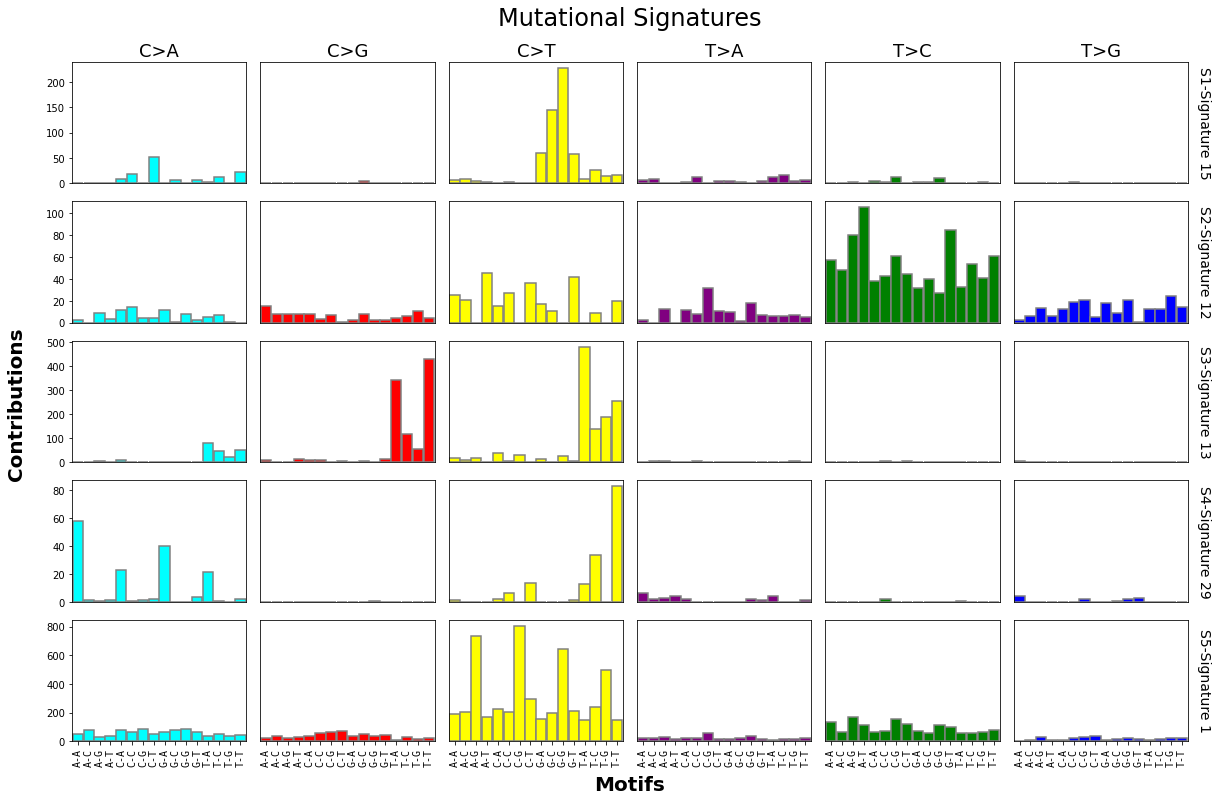

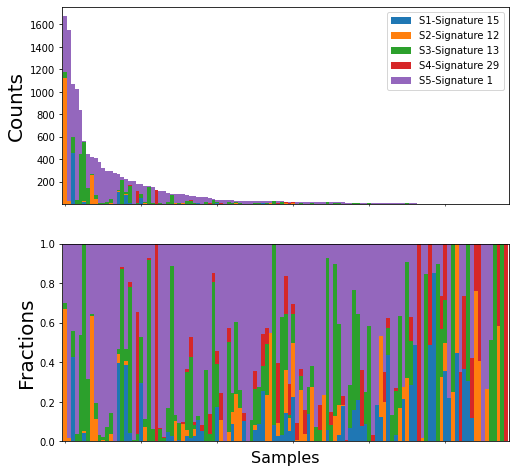

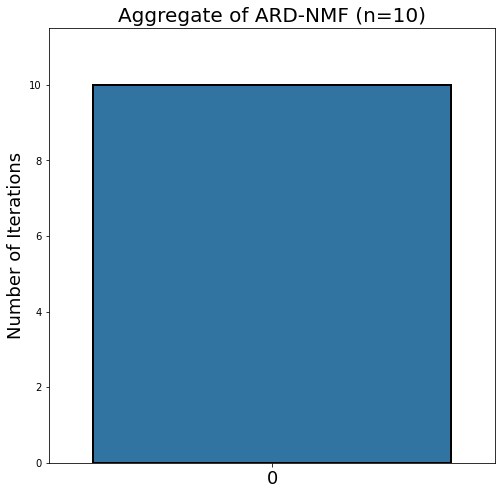

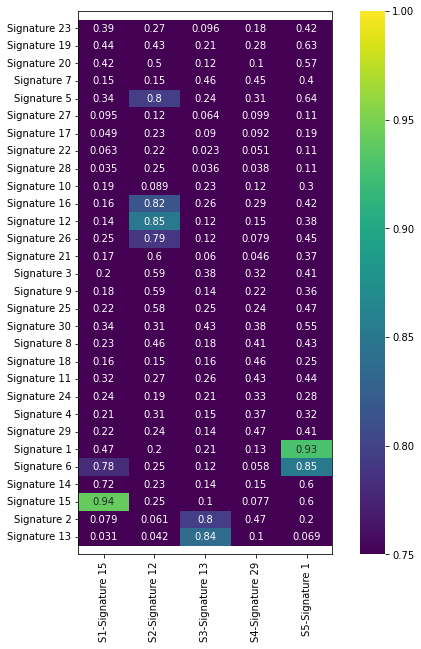

In [26]:
sa.run_maf(all_clones_df, 
           outdir='/home/jupyter/test_signature_analyzer', 
           reference='cosmic2', 
           hg_build='/home/jupyter/hg19.2bit', 
           nruns=10)

   * Creating output dir at /home/jupyter/test_signature_analyzer
   * Using hg19 build
   * Using cosmic3 signatures
   * Loading spectra from       Patient_ID                 Sample_ID  Sample_Alias Hugo_Symbol  \
0        MGH0001             MGH0001-APCCD           NaN       HPSE2   
3        MGH0001             MGH0001-APCCD           NaN         SCD   
8        MGH0001             MGH0001-APCCD           NaN        GBF1   
9        MGH0001             MGH0001-APCCD           NaN       NEURL   
10       MGH0001             MGH0001-APCCD           NaN       NEURL   
...          ...                       ...           ...         ...   
89816  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN        RBP4   
89818  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN       CNTLN   
89835  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN       DCLK2   
89848  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN      STEAP4   
89853  MGHCC1573  MGHCC1573-Tumor-SM-APCJU           NaN        

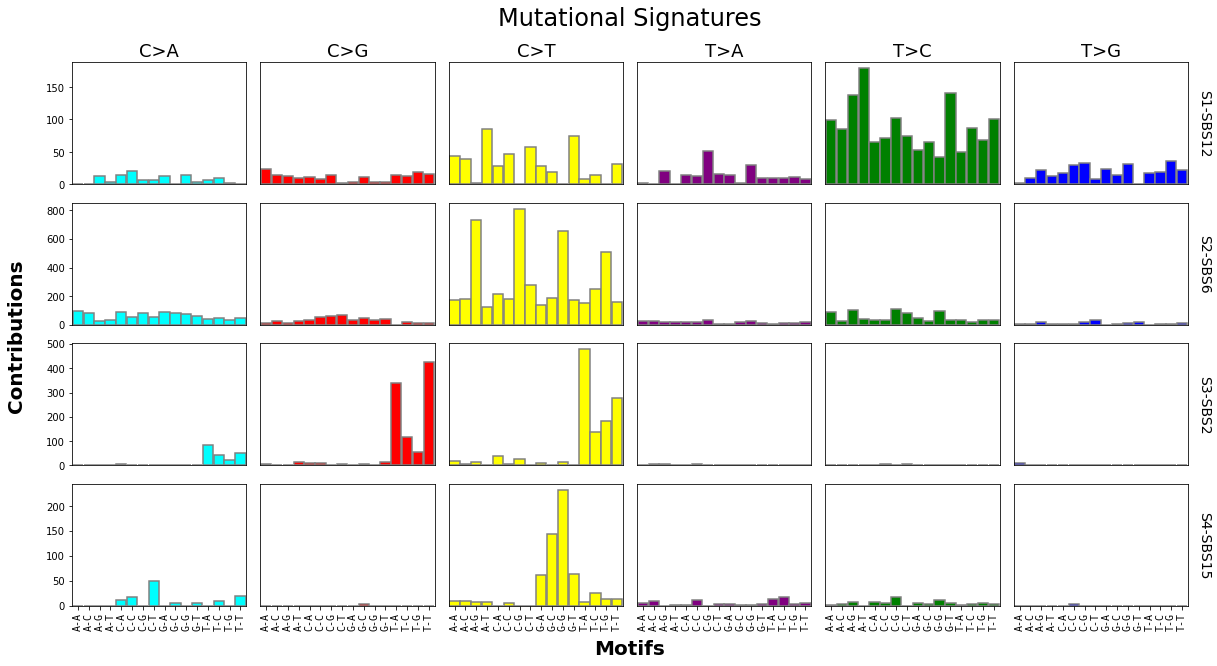

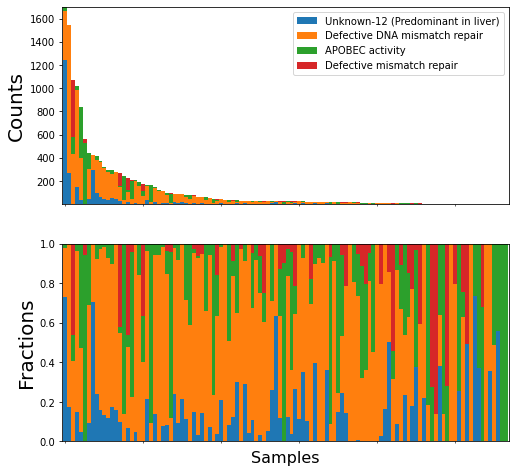

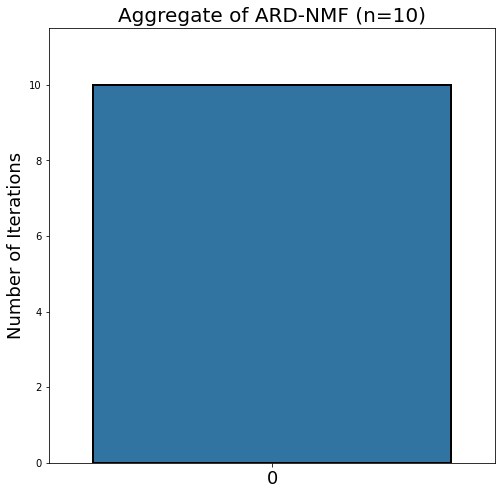

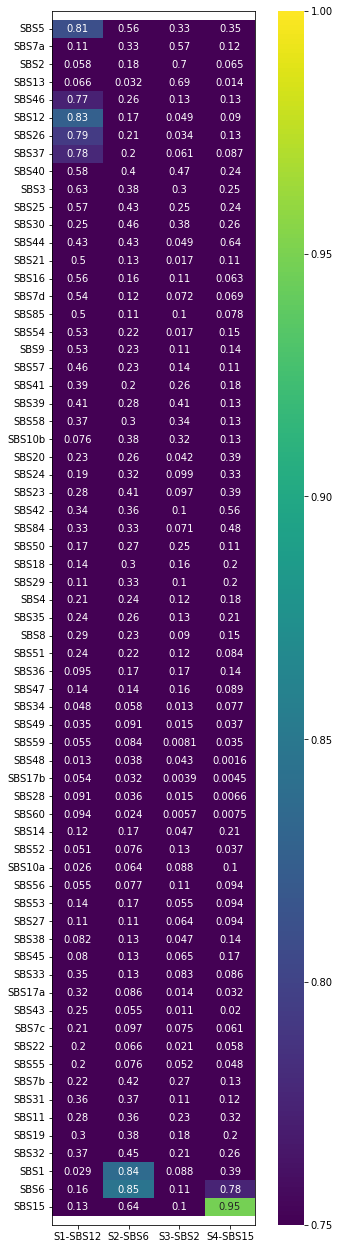

In [53]:
sa.run_maf(all_prepost_noSBS58, 
           outdir='/home/jupyter/test_signature_analyzer', 
           reference='cosmic3', 
           hg_build='/home/jupyter/hg19.2bit', 
           nruns=10)

In [31]:
prepost_sig_weighted_maf = pd.read_csv('signature_weighted_maf.tsv',sep='\t')
prepost_sig_weighted_maf

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,...,sample,End_position,ref_context,context96.num,context96.word,S1-SBS12,S2-SBS6,S3-SBS58,S4-SBS13,S5-SBS15
0,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,CCNL2,1,1322868,C,T,7,2,...,MCHCC0004_set_1,1322868,gcg,91,CTGG,0.000000e+00,0.943270,0.000000,0.056730,1.000000e-45
1,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,CLSTN1,1,9795584,C,T,61,17,...,MCHCC0004_set_1,9795584,tca,93,CTTA,3.704457e-36,0.160213,0.000000,0.839787,0.000000e+00
2,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,CELA2B,1,15813819,G,A,54,11,...,MCHCC0004_set_1,15813819,cgg,87,CTCG,0.000000e+00,0.941726,0.000000,0.058274,0.000000e+00
3,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,UBXN10,1,20517261,C,G,17,24,...,MCHCC0004_set_1,20517261,cca,69,CGCA,4.229055e-29,0.730820,0.000000,0.269180,0.000000e+00
4,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,LUZP1,1,23409854,G,A,11,8,...,MCHCC0004_set_1,23409854,tgt,81,CTAA,3.325797e-29,0.864352,0.000000,0.135648,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,MYBL2,20,42320924,G,A,108,10,...,MGHCC1573_4,42320924,gga,94,CTTC,3.545821e-03,0.457847,0.230542,0.261068,4.699691e-02
14580,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,MIOX,22,50926782,G,A,38,4,...,MGHCC1573_4,50926782,gga,94,CTTC,3.545821e-03,0.457847,0.230542,0.261068,4.699691e-02
14581,MGHCC1573,MGHCC1573-Tumor-SM-APCJK,NaN,EXTL2,1,101343990,C,T,120,6,...,MGHCC1573_5,101343990,cca,85,CTCA,0.000000e+00,0.904585,0.095415,0.000000,0.000000e+00
14582,MGHCC1573,MGHCC1573-Tumor-SM-APCJK,NaN,DMTF1,7,86823991,G,T,32,3,...,MGHCC1573_5,86823991,tgt,49,CAAA,0.000000e+00,0.059808,0.940192,0.000000,0.000000e+00


## Pull out sigs related to SBS58 since that one seems fishy

In [35]:
prepost_sig_weighted_maf.sort_values(by='S3-SBS58',ascending=False).head(50)

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,...,sample,End_position,ref_context,context96.num,context96.word,S1-SBS12,S2-SBS6,S3-SBS58,S4-SBS13,S5-SBS15
11274,MGHCC1099,MGHCC1099-A,NaN,TPP2,13,103266445,C,T,98,2,...,MGHCC1099_4,103266445,tct,96,CTTT,0.000000e+00,3.279724e-33,1.0,1.226325e-32,0.000000e+00
11212,MGHCC1099,MGHCC1099-A,NaN,E2F3,6,20481430,C,T,142,5,...,MGHCC1099_4,20481430,tct,96,CTTT,0.000000e+00,3.279724e-33,1.0,1.226325e-32,0.000000e+00
11210,MGHCC1099,MGHCC1099-A,NaN,JAKMIP2,5,146973916,G,T,84,6,...,MGHCC1099_4,146973916,tga,61,CATA,0.000000e+00,2.979810e-33,1.0,1.541923e-32,0.000000e+00
11097,MGHCC1099,MGHCC1099-A,NaN,SLMAP,3,57817106,G,T,59,3,...,MGHCC1099_2,57817106,tgc,57,CAGA,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
11098,MGHCC1099,MGHCC1099-A,NaN,BUB3,10,124917239,C,T,72,8,...,MGHCC1099_2,124917239,tct,96,CTTT,0.000000e+00,0.000000e+00,1.0,2.717029e-29,0.000000e+00
11099,MGHCC1099,MGHCC1099-A,NaN,ECHS1,10,135184268,C,A,54,4,...,MGHCC1099_2,135184268,gca,57,CAGA,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
11209,MGHCC1099,MGHCC1099-A,NaN,TCERG1,5,145888703,A,T,82,1,...,MGHCC1099_4,145888703,taa,45,ATTA,0.000000e+00,4.166530e-33,1.0,2.154212e-33,6.000000e-45
11100,MGHCC1099,MGHCC1099-A,NaN,IPO7,11,9431466,G,T,26,5,...,MGHCC1099_2,9431466,tgg,53,CACA,0.000000e+00,0.000000e+00,1.0,3.116940e-30,0.000000e+00
11101,MGHCC1099,MGHCC1099-A,NaN,KCNK13,14,90651343,G,A,18,3,...,MGHCC1099_2,90651343,agg,88,CTCT,0.000000e+00,0.000000e+00,1.0,1.004071e-30,0.000000e+00
11102,MGHCC1099,MGHCC1099-A,NaN,MALT1,18,56390275,C,T,101,11,...,MGHCC1099_2,56390275,tca,93,CTTA,0.000000e+00,0.000000e+00,1.0,3.280295e-28,0.000000e+00


In [40]:
SBS58_offenders = prepost_sig_weighted_maf[prepost_sig_weighted_maf['S3-SBS58']==1.0]

grouped = SBS58_offenders.groupby(['Hugo_Symbol','Start_position'])
SBS58_muts_to_remove = []
for name,group in grouped:

    ## need to check if it is below 20% for every individual sample, not the mean
    ccf_list = group.loc[:,'preDP_ccf_mean'].to_list()
    if group.loc[:,'preDP_ccf_mean'].max() < 0.20:
        genes_below_20_percent.append(name)


In [ ]:

# remove mutations from input maf
to_blacklist = []
for i, row in all_clones_df.iterrows():
    if (row['Hugo_Symbol'], row['Start_position']) in genes_below_20_percent:
        to_blacklist.append(row)
        
low_CCF_to_remove = pd.DataFrame(to_blacklist)
low_CCF_to_remove

In [43]:
SBS58_offenders_revised=SBS58_offenders[SBS58_offenders['Hugo_Symbol']!='ESR1']

In [46]:
list(SBS58_offenders_revised['Start_position'])

[32610167,
 38969130,
 57817106,
 124917239,
 135184268,
 9431466,
 90651343,
 56390275,
 44738850,
 37626062,
 21071280,
 22923801,
 23382417,
 29064765,
 35879569,
 36315754,
 86919045,
 93142780,
 93649529,
 117633147,
 146737582,
 186120732,
 201772827,
 211837004,
 226352500,
 226352503,
 227327449,
 24905810,
 37586712,
 55490783,
 152112060,
 152296537,
 169404095,
 169847444,
 170732294,
 172546756,
 172546760,
 199011494,
 203748470,
 228776963,
 14239529,
 25634986,
 33467242,
 44846520,
 49397820,
 51456336,
 52696304,
 58508337,
 64619558,
 73024118,
 113218256,
 130174292,
 132294778,
 136141465,
 137484166,
 180320911,
 180362049,
 180680663,
 183118147,
 190338060,
 1919864,
 8472800,
 20611632,
 26675515,
 42424920,
 57337880,
 69870587,
 70455105,
 70455108,
 70455112,
 71894330,
 88303518,
 89415308,
 89579561,
 89649821,
 123270304,
 139993033,
 146046137,
 146791635,
 167810407,
 174235106,
 184614105,
 10429995,
 32355890,
 43556105,
 94903591,
 102343152,
 1320466

In [49]:
all_prepost_noSBS58 = all_clones_df[~all_clones_df['Start_position'].isin(list(SBS58_offenders_revised['Start_position']))]
all_prepost_noSBS58

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,MGH0001,MGH0001-APCCD,NaN,HPSE2,10,100374744,G,C,201,10,...,13,NaN,NaN,0.58,0.29,0.90,0.72,0.71,0.74,MGH0001_13
3,MGH0001,MGH0001-APCCD,NaN,SCD,10,102120637,G,A,329,1,...,15,NaN,NaN,0.10,0.01,0.19,0.01,0.01,0.01,MGH0001_15
8,MGH0001,MGH0001-APCCD,NaN,GBF1,10,104120909,A,-,102,1,...,12,NaN,NaN,0.24,0.02,0.48,0.02,0.02,0.02,MGH0001_12
9,MGH0001,MGH0001-APCCD,NaN,NEURL,10,105350003,C,G,219,33,...,1,NaN,NaN,0.90,0.78,1.00,1.00,1.00,1.00,MGH0001_1
10,MGH0001,MGH0001-APCCD,NaN,NEURL,10,105350027,C,A,197,29,...,1,NaN,NaN,0.90,0.77,1.00,1.00,1.00,1.00,MGH0001_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89816,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,RBP4,10,95360863,-,CACCC,135,4,...,4,NaN,NaN,0.21,0.05,0.36,0.34,0.30,0.39,MGHCC1573_4
89818,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,CNTLN,9,17340807,-,T,36,11,...,2,NaN,NaN,0.85,0.68,1.00,0.96,0.91,1.00,MGHCC1573_2
89835,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,DCLK2,4,151023535,G,-,1,4,...,2,NaN,NaN,0.83,0.62,1.00,0.96,0.91,1.00,MGHCC1573_2
89848,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,STEAP4,7,87908792,T,-,319,43,...,2,NaN,NaN,0.73,0.52,0.98,0.96,0.91,1.00,MGHCC1573_2


In [52]:
all_prepost_noSBS58.to_csv('all_prepost_removed_SBS58.tsv',sep='\t')

## supervised

      * Mapping contexts: 14376 / 14377
96 intersecting features found.
NMF class initalized.
NMF data and parameters set.
   * Using CPU
nit=    0 K=    6 | obj=17696.57	b_div=6680.46	lam=8954.98	del=112.30754852	sumW=6.00	sumH=14367.42
nit=  100 K=    6 | obj=15975.79	b_div=4959.68	lam=8954.98	del=0.48122188	sumW=6.00	sumH=14367.48
nit=  200 K=    6 | obj=15975.54	b_div=4959.42	lam=8954.98	del=0.28187001	sumW=6.00	sumH=14367.48
nit=  300 K=    6 | obj=15975.51	b_div=4959.40	lam=8954.98	del=0.19507354	sumW=6.00	sumH=14367.48
nit=  400 K=    6 | obj=15975.50	b_div=4959.39	lam=8954.98	del=0.14931837	sumW=6.00	sumH=14367.48
nit=  500 K=    6 | obj=15975.50	b_div=4959.39	lam=8954.98	del=0.12513819	sumW=6.00	sumH=14367.48
nit=  600 K=    6 | obj=15975.50	b_div=4959.39	lam=8954.98	del=0.10505346	sumW=6.00	sumH=14367.48
nit=  700 K=    6 | obj=15975.50	b_div=4959.39	lam=8954.98	del=0.08888221	sumW=6.00	sumH=14367.48
nit=  800 K=    6 | obj=15975.50	b_div=4959.39	lam=8954.98	del=0.07742863	su

Clusters: 100%|██████████| 6/6 [00:00<00:00, 122.50it/s]


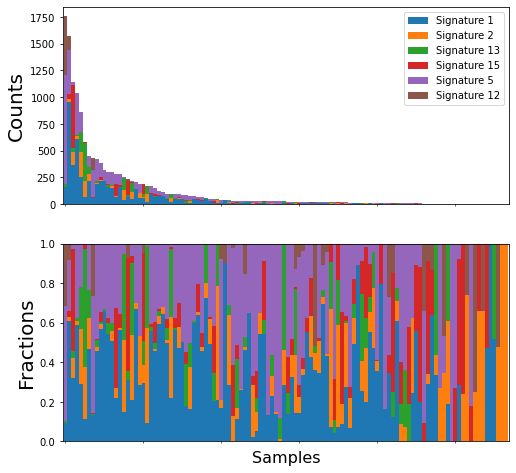

In [55]:
REF = "cosmic2"
#MAF_PATH = "example.maf"

SIG_LIST = ['Signature 1','Signature 2','Signature 13', 'Signature 15','Signature 5','Signature 12']
MAX_ITER = 30000

# Extract mutational spectra
spectra_df = sa.spectra.get_spectra_from_maf(all_prepost_noSBS58, hgfile='/home/jupyter/hg19.2bit', reference=REF)[1]

# Import signature reference data
ref_df, ref_idx = sa.utils.load_reference_signatures(REF, verbose=False)

# Map spectra index to ref index
spectra_df.index = sa.utils._map_sbs_id_sigs(spectra_df,ref_df,REF)

# Subset reference data to create W matrix
Wref_df = ref_df.set_index('Somatic Mutation Type').iloc[:,:-2]
Wref_df = Wref_df.loc[:, SIG_LIST]

# Run supervised NMF
res_supervised_all = sa.supervised_bnmf.supervised_ardnmf(
    spectra_df,
    Wref_df,
    objective='poisson',
    verbose=True,
    max_iter=MAX_ITER)

# Visualized Stacked Barplot for Attributions
_ = sa.pl.stacked_bar(res_supervised_all['H'],ref_type=REF)

In [23]:
old_file = pd.read_hdf('CDK4_by_Clone_Sigs/nmf_output.h5', 'signatures')
correct_context_idx = old_file.index.to_list()

In [56]:
only_tree_sample_mutations_with_spectra, spectra_df = sa.spectra.get_spectra_from_maf(all_prepost_noSBS58, hgfile='/home/jupyter/hg19.2bit', reference='cosmic3')

W = res_supervised_all['W']
W.reset_index(inplace=True, drop=True)
W['context96.word'] = correct_context_idx
W.set_index('context96.word',inplace=True)

onyl_tree_clones_supervised_weighted_maf = sa.utils.assign_signature_weights_to_maf(only_tree_sample_mutations_with_spectra, res_supervised_all['W'], res_supervised_all['H'])



      * Mapping contexts: 14376 / 14377


In [60]:
onyl_tree_clones_supervised_weighted_maf

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,...,End_position,ref_context,context96.num,context96.word,Signature 1,Signature 2,Signature 13,Signature 15,Signature 5,Signature 12
0,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,CCNL2,1,1322868,C,T,7,2,...,1322868,gcg,91,CTGG,0.584603,0.005190,0.013190,0.000000,0.397016,0.0
1,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,CLSTN1,1,9795584,C,T,61,17,...,9795584,tca,93,CTTA,0.456347,0.000005,0.042061,0.000000,0.501587,0.0
2,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,CELA2B,1,15813819,G,A,54,11,...,15813819,cgg,87,CTCG,0.409073,0.000014,0.015434,0.000000,0.575480,0.0
3,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,UBXN10,1,20517261,C,G,17,24,...,20517261,cca,69,CGCA,0.257623,0.006361,0.009821,0.000000,0.726196,0.0
4,MCHCC0004_set,MGHCC0004-Tumor-SM-APCGF,NaN,LUZP1,1,23409854,G,A,11,8,...,23409854,tgt,81,CTAA,0.443758,0.015176,0.007705,0.000000,0.533361,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,MYBL2,20,42320924,G,A,108,10,...,42320924,gga,94,CTTC,0.023125,0.004846,0.000000,0.045887,0.926142,0.0
14373,MGHCC1573,MGHCC1573-Tumor-SM-APCJU,NaN,MIOX,22,50926782,G,A,38,4,...,50926782,gga,94,CTTC,0.023125,0.004846,0.000000,0.045887,0.926142,0.0
14374,MGHCC1573,MGHCC1573-Tumor-SM-APCJK,NaN,EXTL2,1,101343990,C,T,120,6,...,101343990,cca,85,CTCA,0.000000,0.000000,0.000000,0.119636,0.880364,0.0
14375,MGHCC1573,MGHCC1573-Tumor-SM-APCJK,NaN,DMTF1,7,86823991,G,T,32,3,...,86823991,tgt,49,CAAA,0.000000,0.000000,0.000000,0.000000,1.000000,0.0


In [57]:
onyl_tree_clones_supervised_weighted_maf.to_csv('prepost_cosmic2_sigs_supervised_noSBS58.tsv',sep='\t')



In [71]:
onyl_tree_clones_supervised_weighted_maf.iloc[:, [23,28,29,30,31,32,33]]



,sample,Signature 1,Signature 2,Signature 13,Signature 15,Signature 5,Signature 12
0,MCHCC0004_set_1,0.584603,0.005190,0.013190,0.000000,0.397016,0.0
1,MCHCC0004_set_1,0.456347,0.000005,0.042061,0.000000,0.501587,0.0
2,MCHCC0004_set_1,0.409073,0.000014,0.015434,0.000000,0.575480,0.0
3,MCHCC0004_set_1,0.257623,0.006361,0.009821,0.000000,0.726196,0.0
4,MCHCC0004_set_1,0.443758,0.015176,0.007705,0.000000,0.533361,0.0
...,...,...,...,...,...,...,...
14372,MGHCC1573_4,0.023125,0.004846,0.000000,0.045887,0.926142,0.0
14373,MGHCC1573_4,0.023125,0.004846,0.000000,0.045887,0.926142,0.0
14374,MGHCC1573_5,0.000000,0.000000,0.000000,0.119636,0.880364,0.0
14375,MGHCC1573_5,0.000000,0.000000,0.000000,0.000000,1.000000,0.0


In [72]:
supervised_clones_and_sigs_tree = onyl_tree_clones_supervised_weighted_maf.iloc[:, [23,28,29,30,31,32,33]]
supervised_clones_and_sigs_tree.set_index('sample',inplace=True)

supervised_clones_unique_tree=list(onyl_tree_clones_supervised_weighted_maf['sample'].unique())
## collapse and average code

supervised_collapsed_sigs_list = []
supervised_collapsed_sigs_dict={}

for sample in supervised_clones_unique_tree:

    avg_sig = supervised_clones_and_sigs_tree.loc[sample].mean(axis=0)
    supervised_collapsed_sigs_list.append(avg_sig)
    supervised_collapsed_sigs_dict[sample] = avg_sig
    
supervised_new_collapsed_df_tree = pd.DataFrame.from_dict(supervised_collapsed_sigs_dict)


supervised_transpose_tree = supervised_new_collapsed_df_tree.T
supervised_transpose_tree.to_csv("prepost_with_cosmic2_sigs_120523_v2.tsv", sep='\t')

In [70]:
supervised_transpose_tree

,Signature 2,Signature 13,Signature 15,Signature 5,Signature 12
MCHCC0004_set_1,0.023038,0.041039,0.000000,0.512126,0.000000
MCHCC0004_set_2,0.034226,0.000000,0.000000,0.583080,0.000000
MCHCC0004_set_3,0.002049,0.044401,0.304685,0.190434,0.000000
MCHCC0004_set_4,0.016728,0.000000,0.000000,0.983272,0.000000
MCHCC0004_set_5,0.011557,0.000000,0.039483,0.438970,0.121078
...,...,...,...,...,...
MGHCC1573_1,0.000000,0.000000,0.000000,0.719933,0.000000
MGHCC1573_2,0.067716,0.000000,0.060934,0.836920,0.000000
MGHCC1573_3,0.000000,0.000000,0.630856,0.258493,0.000000
MGHCC1573_4,0.028796,0.000000,0.054882,0.898318,0.000000
